In [5]:
from fastai import *
from fastai.tabular.all import *
import pandas as pd
import numpy as np

In [6]:
train_data = pd.read_csv('playground-series-s4e2/train.csv')
test_data = pd.read_csv('playground-series-s4e2/test.csv')

In [7]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
splits = RandomSplitter(valid_pct=0.2)(train_data)
cat_names = ["Gender", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
cont_names = ["Age", "Height", "Weight"]
y_names = ["NObeyesdad"]
dls = TabularDataLoaders.from_df(train_data, y_names=y_names, procs=[Categorify, FillMissing, Normalize], splits=splits, cat_names=cat_names, cont_names=cont_names, bs=64)

In [10]:
dls.show_batch()

,Gender,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,NObeyesdad
0,Female,yes,yes,3.0,3.0,Sometimes,no,no,Sometimes,Public_Transportation,26.000000,1.629191,105.686089,Obesity_Type_III
1,Male,no,yes,2.0,3.0,Always,no,no,Sometimes,Public_Transportation,20.000000,1.810000,68.999999,Normal_Weight
2,Male,yes,yes,1.387489,3.0,Sometimes,no,no,Sometimes,Automobile,30.605225,1.758382,112.100739,Obesity_Type_II
3,Female,yes,yes,2.0,3.0,Sometimes,no,no,Sometimes,Public_Transportation,21.000000,1.590000,57.000000,Normal_Weight
4,Male,yes,yes,2.910345,3.0,Sometimes,no,no,Sometimes,Public_Transportation,18.000000,1.816298,51.437983,Insufficient_Weight
5,Female,no,no,3.0,3.0,Frequently,no,yes,Sometimes,Public_Transportation,20.000000,1.600000,45.000001,Insufficient_Weight
6,Female,yes,yes,1.836554,1.0,Sometimes,no,no,Sometimes,Public_Transportation,22.815416,1.632118,82.039002,Obesity_Type_I
7,Female,yes,yes,3.0,3.0,Sometimes,no,no,Sometimes,Automobile,24.000000,1.690000,67.000000,Overweight_Level_I
8,Male,yes,yes,2.0,3.0,Sometimes,no,no,Sometimes,Public_Transportation,20.000000,1.720000,98.000000,Overweight_Level_II
9,Female,yes,yes,3.0,3.0,Sometimes,no,no,Sometimes,Public_Transportation,21.274628,1.627532,111.216194,Obesity_Type_III


In [11]:
learn = tabular_learner(dls, metrics=accuracy)


In [12]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.518290,0.424109,0.848470,00:02
1,0.437545,0.373860,0.864129,00:02
2,0.363322,0.368439,0.866297,00:02
3,0.331538,0.371371,0.867502,00:02
4,0.305336,0.379857,0.865093,00:02


In [13]:
test_dl = learn.dls.test_dl(test_data)
preds, _ = learn.get_preds(dl=test_dl)
preds

tensor([[2.9215e-04, 2.3564e-04, 3.6101e-03,  ..., 9.0007e-04, 2.4155e-04,
         6.4717e-04],
        [1.3318e-03, 2.3613e-01, 1.3624e-02,  ..., 6.1793e-04, 7.2327e-01,
         2.4661e-02],
        [2.4320e-04, 3.5038e-04, 5.7879e-04,  ..., 9.9797e-01, 1.3665e-04,
         1.2459e-04],
        ...,
        [9.7214e-01, 2.6491e-02, 1.1210e-05,  ..., 6.6147e-04, 6.0923e-04,
         2.1021e-05],
        [2.8700e-01, 7.0960e-01, 6.8330e-05,  ..., 2.1992e-04, 2.3615e-03,
         5.4087e-04],
        [2.1151e-04, 1.2384e-04, 3.0575e-03,  ..., 7.1617e-04, 1.2528e-04,
         3.2850e-04]])

In [14]:
len(preds[0])

7

In [15]:
preds[0]

tensor([2.9215e-04, 2.3564e-04, 3.6101e-03, 9.9407e-01, 9.0007e-04, 2.4155e-04,
        6.4717e-04])

In [16]:
test_data["NObeyesdad"] = preds.argmax(dim=-1)

In [17]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,3
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,5
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,4
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,2
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,4


In [18]:
test_data["NObeyesdad"].replace({0: "Insufficient_Weight", 1: "Normal_Weight", 2: "Overweight_Level_I", 3: "Overweight_Level_II", 4: "Obesity_Type_I", 5: "Obesity_Type_II", 6: "Obesity_Type_III"}, inplace=True)
test_data["NObeyesdad"].replace(" ", "_", regex=True, inplace=True)

/tmp/ipykernel_582651/2066691519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["NObeyesdad"].replace({0: "Insufficient_Weight", 1: "Normal_Weight", 2: "Overweight_Level_I", 3: "Overweight_Level_II", 4: "Obesity_Type_I", 5: "Obesity_Type_II", 6: "Obesity_Type_III"}, inplace=True)


In [19]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,Obesity_Type_I
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,Obesity_Type_I


In [20]:
sub_df = test_data[["id", "NObeyesdad"]].copy()
sub_df.to_csv('submission.csv', index=False)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
trn_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42)
trn_df[cat_names] = trn_df[cat_names].astype('category')
val_df[cat_names] = val_df[cat_names].astype('category')

In [22]:
trn_df[cat_names] = trn_df[cat_names].apply(lambda x: x.cat.codes)
val_df[cat_names] = val_df[cat_names].apply(lambda x: x.cat.codes)

In [23]:
dep = 'NObeyesdad'
def xs_y(df):
    xs = df[cat_names+cont_names].copy()
    return xs,df[dep] if dep in df else None
xs_trn, y_trn = xs_y(trn_df)

In [24]:
m = DecisionTreeClassifier(max_depth=5).fit(xs_trn, y_trn)

In [25]:
import graphviz
from sklearn.tree import export_graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))



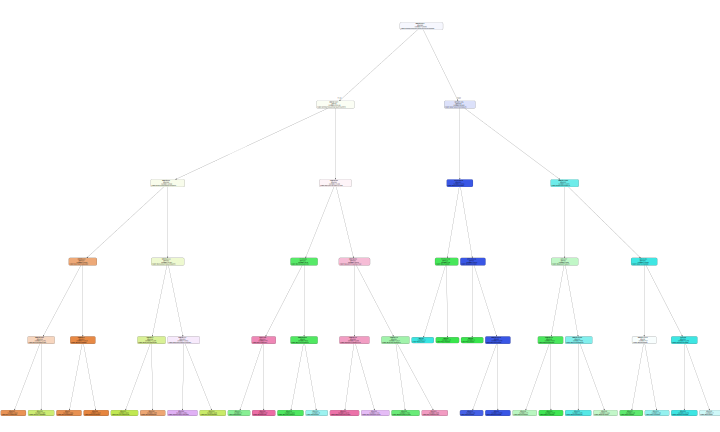

In [26]:
draw_tree(m, xs_trn)

In [31]:
test_data[cat_names] = test_data[cat_names].astype('category')
test_data[cat_names] = test_data[cat_names].apply(lambda x: x.cat.codes)
tst_xs_, _ = xs_y(test_data)
tst_xs_

test_data["NObeyesdad"] = m.predict(tst_xs_)
test_data["NObeyesdad"].replace({0: "Insufficient_Weight", 1: "Normal_Weight", 2: "Overweight_Level_I", 3: "Overweight_Level_II", 4: "Obesity_Type_I", 5: "Obesity_Type_II", 6: "Obesity_Type_III"}, inplace=True)

/tmp/ipykernel_582651/4218750938.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["NObeyesdad"].replace({0: "Insufficient_Weight", 1: "Normal_Weight", 2: "Overweight_Level_I", 3: "Overweight_Level_II", 4: "Obesity_Type_I", 5: "Obesity_Type_II", 6: "Obesity_Type_III"}, inplace=True)


In [32]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,20758,1,26.899886,1.848294,120.644178,1,1,762,509,2,0,2.825629,0,0.855400,0.000000,2,3,Obesity_Type_II
1,20759,0,21.000000,1.600000,66.000000,1,1,187,0,2,0,3.000000,0,1.000000,0.000000,2,3,Overweight_Level_I
2,20760,0,26.000000,1.643355,111.600553,1,1,827,509,2,0,2.621877,0,0.000000,0.250502,2,3,Obesity_Type_I
3,20761,1,20.979254,1.553127,103.669116,1,1,187,474,2,0,2.786417,0,0.094851,0.000000,2,3,Obesity_Type_I
4,20762,0,26.000000,1.627396,104.835346,1,1,827,509,2,0,2.653531,0,0.000000,0.741069,2,3,Obesity_Type_I


In [33]:
sub_df = test_data[["id", "NObeyesdad"]].copy()
sub_df.to_csv('submission_decision_tree.csv', index=False)